### Assignment for Week-6: Path Sampling, A firework of algorithm

**C**

In this section, we are concerned with the anharmonic oscillator. You will come up with vastly better algorithms than in Homework Session 5. You will need the potential function from last week.

def V(x, cubic, quartic): <br>
    pot = x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4<br>
    return pot<br>

You first construct, in **Section C1**, paths in the anharmonic oscillator from the free Lévy construction + a correction that will be accepted/rejected with the Metropolis algorithm. Then, in **Section C2**, you will again construct paths from the harmonic Lévy construction + another correction, again accepted or rejected with the Metropolis algorithm. You will convince yourself that the outcome is the same.


**C1**

In order to write a path-sampling algorithm from the free Lévy construction, add the function levy_free_path to the algorithm of **section B2**. For your convenience, it is given below.Attention:

- use this function and not the one from Lecture 5 (It outputs a path of length N and not of length N+1).

- keep levy_harmonic_path in the program, as you will use it in **Section C2**.


The difference between the statistical weight of the path and the weight used for the free Lévy construction is equal to exp(- \sum delta_tau \sum_i V(i)) or, in other words:

Trotter_weight = math.exp(sum(-V(a, cubic, quartic) * dtau for a in x))

(compare with **Section B, it is important to realize that the rho_free part of the free density matrix** is no longer in the Metropolis step).

Therefore, you should **replace the harmonic Levy construction** of section **B2** by the **free Levy construction**, but new paths should be accepted with the Metropolis algorithm.

To prepare the **program of this section**, you should

- **Incorporate a function V(x, cubic, quartic)**, as indicated in the beginning of this section.

- **Construct a new path (x_new) between x[0] and x[0]**, from Levy_free_path.

- **Compute** its Trotter weight, the part of the statistical weight not yet taken into account by the path construction, using the above snippet. Again: rho_free is no longer part of the correction which is used to accept or reject the move. Note that at cubic=quartic=0, there is no correction.

- **Accept**  the new path with probability min(1, Weight_new/ Weight_old) and **Update** the Weight_old (if move accepted).

- **Update** the path (if move accepted). To do so, use **x = x_new[:]**, rather than  **x = x_new**.

- Wrap the path, as in section **B2**. For instance you can use: **x = x[1:] + x[:1]**.

- Check your program for cubic = quartic = 0, for small beta. 

At beta=20, the acceptance rate will have become very small. So, rather than reconstructing an entire new path, you should only reconstruct it between 0 and Ncut. This can be done as in the following line

x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]

where Ncut is chosen suitably (you might want to check the acceptance rate).Therefore, construct a new path between 0 and Ncut, and use the old path from Ncut through N - 1.

Once your program is ready:

- **Upload the program**

(-2.0, 2.0)

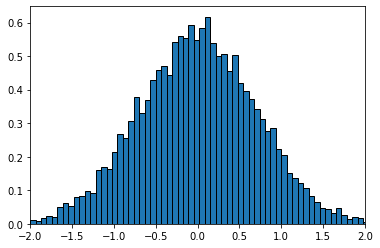

In [39]:
import math, random, numpy, pylab
#anharmonic potential
def V(x, cubic, quartic): 
    pot = x ** 2 / 2.0 + cubic * x ** 3 + quartic * x ** 4
    return pot

#levy free path
def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

#levy harmonic path
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 100
Ncut = int(N/2.0)
dtau = beta / N
delta = 1.0
n_steps = 1000000
x = [5.0] * N
cubic = 0
quartic = 0
data = []
for step in range(n_steps):
    Weight_old = math.exp(sum(-V(a, cubic, quartic) * dtau for a in x))
    x_new = levy_free_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]
    Weight_new = math.exp(sum(-V(a, cubic, quartic) * dtau for a in x_new))

    if random.uniform(0.0, 1.0) < Weight_new / Weight_old: #Metropolis selection rule
        x = x_new[:]   
    x = x[1:] + x[:1]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])

**C1 (continued)**

Run it for beta=20, N=100, and -cubic=quartic=1. Upload the histogram of the x positions.

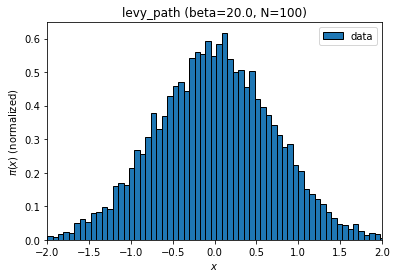

In [40]:
pylab.hist(data,  bins=100, density= True, stacked = True, ec = "black", label='data')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

**C2**

Adapt the program of Section C1 now using the harmonic Lévy construction rather than the free Lévy construction. Please notice that the potential V of Section C1 must be replaced with a potential

**def V_anharm(x, cubic, quartic):**

which should no longer contain the harmonic (x**2) part. The Trotter weight likewise should contain V_anharm rather than the entire V.

As in C1, you should only reconstruct a portion of the path (from 0 to Ncut -1, with an appropriate choice of Ncut).

Make sure your program agrees with  Section B2 for cubic = quartic = 0.0.

- Upload your program.

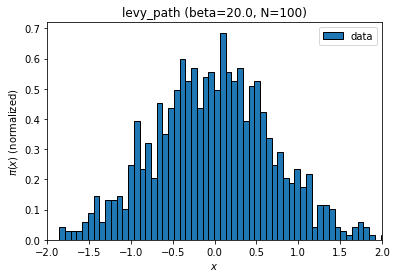

In [53]:
import math, random, numpy, pylab
#anharmonic potential
def V_anharm(x, cubic, quartic): 
    pot = cubic * x ** 3 + quartic * x ** 4
    return pot

#levy free path
def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

#levy harmonic path
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 100
Ncut = int(N/2.0)
dtau = beta / N
delta = 1.0
n_steps = 100000
x = [5.0] * N
cubic = 0
quartic = 0
data = []
for step in range(n_steps):
    Weight_old = math.exp(sum(-V_anharm(a, cubic, quartic) * dtau for a in x))
    x_new = levy_harmonic_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]
    Weight_new = math.exp(sum(-V_anharm(a, cubic, quartic) * dtau for a in x_new))

    if random.uniform(0.0, 1.0) < Weight_new / Weight_old: #Metropolis selection rule
        x = x_new[:]   
    x = x[1:] + x[:1]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])
pylab.hist(data,  bins=100, density= True, stacked = True, ec = "black", label='data')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

**C2 (continued)**

- Run your program  at beta = 20, N=100, for -cubic = quartic = 1, and upload a graphics  file with the histogram of x positions for -cubic = quartic = 1.

In [65]:
import math, random, numpy, pylab
#anharmonic potential
def V_anharm(x, cubic, quartic): 
    pot = cubic * x ** 3 + quartic * x ** 4
    return pot

#levy free path
def levy_free_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        x.append(random.gauss(x_mean, sigma))
    return x

#levy harmonic path
def levy_harmonic_path(xstart, xend, dtau, N):
    x = [xstart]
    for k in range(1, N):
        dtau_prime = (N - k) * dtau
        Ups1 = 1.0 / math.tanh(dtau) + \
               1.0 / math.tanh(dtau_prime)
        Ups2 = x[k - 1] / math.sinh(dtau) + \
               xend / math.sinh(dtau_prime)
        x.append(random.gauss(Ups2 / Ups1, \
               1.0 / math.sqrt(Ups1)))
    return x

beta = 20.0
N = 100
Ncut = int(N/2.0)
dtau = beta / N
delta = 1.0
n_steps = 10000
x = [5.0] * N
cubic = -1
quartic = 1
data = []
for step in range(n_steps):
    Weight_old = math.exp(sum(-V_anharm(a, cubic, quartic) * dtau for a in x))
    x_new = levy_harmonic_path(x[0], x[Ncut], dtau, Ncut) + x[Ncut:]
    #print(Weight_old)
    Weight_new = math.exp(sum(-V_anharm(a, cubic, quartic) * dtau for a in x_new))
    #print(Weight_new)
    if random.uniform(0.0, 1.0) < Weight_new / Weight_old: #Metropolis selection rule
        x = x_new[:]   
    x = x[1:] + x[:1]
    if step % N == 0:
        k = random.randint(0, N - 1)
        data.append(x[k])
pylab.hist(data,  bins=100, density= True, stacked = True, ec = "black", label='data')
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$ (normalized)')
pylab.title('levy_path (beta=%s, N=%i)' % (beta, N))
pylab.xlim(-2, 2)
#pylab.savefig('plot_B1_beta%s.png' % beta)
pylab.show()

ZeroDivisionError: float division by zero

**C2 (continued)**

- Run your program  at beta = 20, N=100, for -cubic = quartic = 1, and upload a graphics  file with the histogram of x positions for -cubic = quartic = 1.